# Import Libraries

In [0]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120,
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set(font_scale=1.3)


# Generating Data

In [3]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples=100, n_features=1, n_targets=1,
                               noise=30.0, random_state=42)
print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (100, 1)
target shape: (100,)


In [4]:
data[:5]

array([[0.93],
       [0.09],
       [-1.06],
       [0.31],
       [-0.48]])

In [5]:
target[:5]

array([74.59, -37.46, -16.46, 5.35, -13.21])

[]

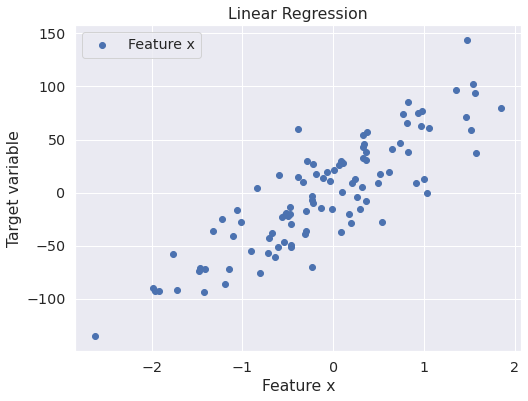

In [6]:
plt.figure(figsize=(8,6))
plt.title('Linear Regression')
plt.xlabel('Feature x')
plt.ylabel('Target variable')
plt.scatter(data, target, label='Feature x')
plt.legend()
plt.plot()

# Linear regression using by scikit-learn

$$ Y=w_0 + w_1X1 $$

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
regressor.score(data, target)

0.7426670084336404

In [9]:
y_pred = regressor.predict(data)
y_pred

array([49.90, 7.83, -49.21, 19.15, -20.38, 35.77, -19.60, 30.53, 33.97, 53.50, 44.45, 80.13, 40.29, -7.45, -36.79,
       8.07, -94.15, 29.07, 54.87, -127.04, 28.25, 8.33, -19.71, 49.11, 81.46, 76.53, -26.43, 1.71, -26.49, -56.11,
       21.29, 22.22, 16.50, -22.90, -41.75, 13.30, -11.40, 21.52, 44.48, -11.04, 21.50, -30.24, 79.39, -22.33, -8.17,
       -16.04, -11.51, -28.65, 19.88, 13.90, -12.83, 3.75, -8.17, 77.14, -15.69, 20.62, 20.00, -5.76, -8.19, -95.54,
       19.64, -7.75, -51.63, -31.49, -69.43, 51.76, -82.46, -91.84, -24.52, 41.74, 43.98, -66.88, -70.18, -57.34,
       -38.32, 82.19, 52.11, 15.55, 18.25, -23.63, -84.36, 9.02, 12.03, -62.69, 56.17, -2.27, -19.90, 2.82, -46.97,
       -3.39, -53.86, 71.08, 6.86, -21.51, -19.46, 95.79, -67.50, -32.37, -0.09, -11.91])

# Graphic visualization of the model

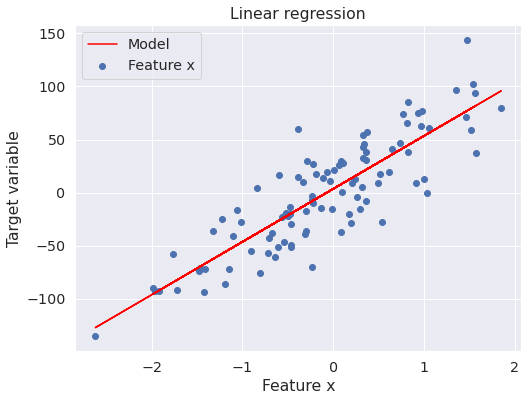

In [10]:
plt.figure(figsize=(8,6))
plt.title('Linear regression')
plt.xlabel('Feature x')
plt.ylabel('Target variable')
plt.scatter(data, target, label='Feature x')
plt.plot(data, y_pred, color='red', label='Model')
plt.legend()
plt.show()

# Coef $R^2$


Coefficient $R^2$ is defined as $1-\frac{u}{v}$ where $u$: \
((y_true-y_pred)**2).sum() \
and $v$: \
(((y_true - y_pred)**2.sum()) /(((y_true-y_true.mean())**2).sum())

In [12]:
regressor.score(data, target)

0.7426670084336404

In [13]:
[item for item in dir(regressor) if not item.startswith('_')]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [14]:
regressor.coef_

array([49.83])

In [15]:
regressor.intercept_

3.4953459615809175

# Final model figure

$$ Y=w_0+w_1X_1 $$

$$ Y=3.495+49.83 \cdot X_1 $$

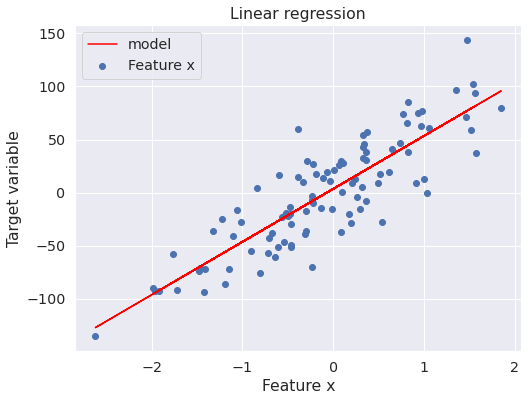

In [16]:
plt.figure(figsize=(8,6))
plt.title('Linear regression')
plt.xlabel('Feature x')
plt.ylabel('Target variable')
plt.scatter(data, target, label='Feature x')
plt.plot(data, regressor.intercept_ + regressor.coef_[0] *data, color='red',
         label='model')
plt.legend()
plt.show()

# Linear Regression, Train test split

In [17]:
data, target = make_regression(n_samples=1000, n_features=1, n_targets=1,
                               noise=15.0, random_state=42)
print(f'Data shape: {data.shape}')
print(f'Target shape: {target.shape}')

Data shape: (1000, 1)
Target shape: (1000,)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (750, 1)
X_test shape: (250, 1)
y_train shape: (750,)
y_test shape: (250,)


[]

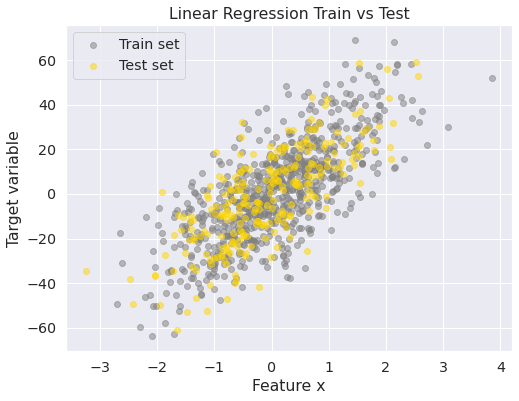

In [22]:
plt.figure(figsize=(8,6))
plt.title('Linear Regression Train vs Test')
plt.xlabel('Feature x')
plt.ylabel('Target variable')
plt.scatter(X_train, y_train, label='Train set', color='gray',alpha=0.5)
plt.scatter(X_test, y_test, label='Test set', color='gold', alpha=0.5)
plt.legend()
plt.plot()

In [23]:
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
regressor.score(X_train, y_train)

0.5358651607106343

In [25]:
regressor.score(X_test, y_test)

0.5659717578254748

#Linear regression- Graphic visualization of the Train set

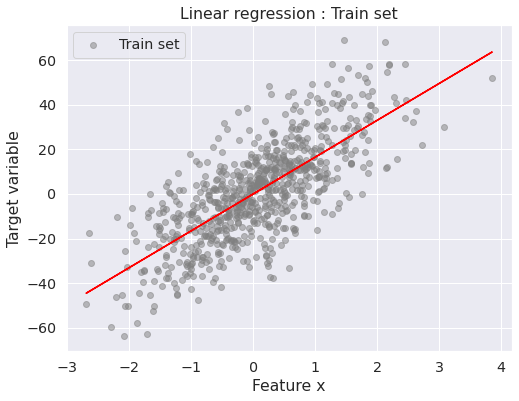

In [26]:
plt.figure(figsize=(8,6))
plt.title('Linear regression : Train set')
plt.xlabel('Feature x')
plt.ylabel('Target variable')
plt.scatter(X_train, y_train, label='Train set', color='gray', alpha=0.5)
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0] * X_train, 
         color='red')
plt.legend()
plt.show()

# Linear regression - Graphic visualization of the Test set

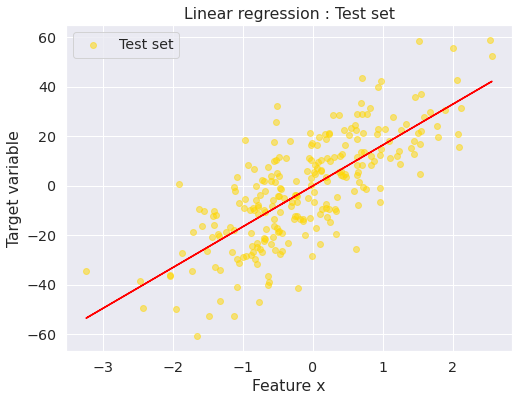

In [27]:
plt.figure(figsize=(8,6))
plt.title('Linear regression : Test set')
plt.xlabel('Feature x')
plt.ylabel('Target variable')
plt.scatter(X_test, y_test, label='Test set', color='gold', alpha=0.5)
plt.plot(X_test, regressor.intercept_ + regressor.coef_[0] * X_test, 
         color='red')
plt.legend()
plt.show()

# Predictions

In [28]:
y_pred = regressor.predict(X_test)

predictions = pd.DataFrame(data={'y_true': y_test, 'y_pred': y_pred})
predictions.head()

,y_true,y_pred
0,-1.015112,-7.862339
1,-0.746220,15.814004
2,43.431648,11.661877
3,-1.931385,9.803136
4,-11.866084,-22.764698


In [29]:
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,-1.015112,-7.862339,6.847227
1,-0.746220,15.814004,-16.560224
2,43.431648,11.661877,31.769771
3,-1.931385,9.803136,-11.734521
4,-11.866084,-22.764698,10.898614


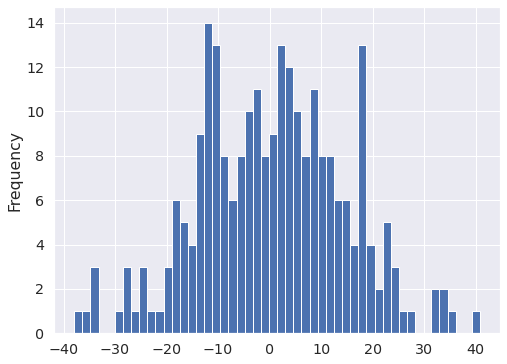

In [30]:
_ = predictions['error'].plot(kind='hist', bins=50, figsize=(8,6))